## Genetic Algorithm For Finding Relevant Feature For Different Models.

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from random import randint
from sklearn.metrics import roc_curve, auc
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import roc_curve, auc


from sklearn.model_selection import train_test_split
def split(df,label):
    X_tr, X_te, Y_tr, Y_te = train_test_split(df, label, test_size=0.25, random_state=42)
    return X_tr, X_te, Y_tr, Y_te
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score


classifiers = ['LinearSVM', 'RadialSVM', 
               'Logistic',  'RandomForest', 
               'AdaBoost',  'DecisionTree', 
               'KNeighbors','GradientBoosting']

models = [svm.SVC(kernel='linear'),
          svm.SVC(kernel='rbf'),
          LogisticRegression(max_iter = 1000),
          RandomForestClassifier(n_estimators=200, random_state=0),
          AdaBoostClassifier(random_state = 0),
          DecisionTreeClassifier(random_state=0),
          KNeighborsClassifier(),
          GradientBoostingClassifier(random_state=0)]


def acc_score(df,label):
    Score = pd.DataFrame({"Classifier":classifiers})
    j = 0
    acc = []
    X_train,X_test,Y_train,Y_test = split(df,label)
    for i in models:
        model = i
        model.fit(X_train,Y_train)
        predictions = model.predict(X_test)
        acc.append(accuracy_score(Y_test,predictions))
        j = j+1     
    Score["Accuracy"] = acc
    Score.sort_values(by="Accuracy", ascending=False,inplace = True)
    Score.reset_index(drop=True, inplace=True)
    return Score


def plot(score,x,y,c = "b"):
    gen = [1,2,3,4,5]
    plt.figure(figsize=(6,4))
    ax = sns.pointplot(x=gen, y=score,color = c )
    ax.set(xlabel="Generation", ylabel="Accuracy")
    ax.set(ylim=(x,y))

In [21]:
def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=np.bool)     
        chromosome[:int(0.3*n_feat)]=False             
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

def fitness_score(population):
    scores = []
    for chromosome in population:
        logmodel.fit(X_train.iloc[:,chromosome],Y_train)         
        predictions = logmodel.predict(X_test.iloc[:,chromosome])
        scores.append(accuracy_score(Y_test,predictions))
    scores, population = np.array(scores), np.array(population) 
    inds = np.argsort(scores)  
    return list(scores[inds][::-1]), list(population[inds,:][::-1]) 

def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    print(population_nextgen[-1])
    return population_nextgen

def crossover(pop_after_sel):
    pop_nextgen = pop_after_sel
    for i in range(0,len(pop_after_sel),2):
        new_par = []
        child_1 , child_2 = pop_nextgen[i] , pop_nextgen[i+1]
        new_par = np.concatenate((child_1[:len(child_1)//2],child_2[len(child_1)//2:]))
        pop_nextgen.append(new_par)
    return pop_nextgen

def mutation(pop_after_cross,mutation_rate,n_feat):   
    mutation_range = int(mutation_rate*n_feat)
    pop_next_gen = []
    for n in range(0,len(pop_after_cross)):
        chromo = pop_after_cross[n]
        rand_posi = [] 
        for i in range(0,mutation_range):
            pos = randint(0,n_feat-1)
            rand_posi.append(pos)
        for j in rand_posi:
            chromo[j] = not chromo[j]  
        pop_next_gen.append(chromo)
    return pop_next_gen

def generations(df,label,size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, Y_train, Y_test):
    best_chromo= []
    best_score= []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        print('Best score in generation',i+1,':',scores[:1])  #2
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate,n_feat)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score

In [3]:
data_bc = pd.read_csv("data.csv")
label_bc = data_bc["diagnosis"]
label_bc = np.where(label_bc == 'M',1,0)
data_bc.drop(["id","diagnosis","Unnamed: 32"],axis = 1,inplace = True)

print("Breast Cancer dataset:\n",data_bc.shape[0],"Records\n",data_bc.shape[1],"Features")

Breast Cancer dataset:
 569 Records
 30 Features


In [4]:
data_bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [5]:
display(data_bc.head())
print("All the features in this dataset have continuous values")

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


All the features in this dataset have continuous values


In [6]:
score1 = acc_score(data_bc,label_bc)
score1

,Classifier,Accuracy
0,RandomForest,0.972028
1,Logistic,0.965035
2,KNeighbors,0.965035
3,LinearSVM,0.958042
4,GradientBoosting,0.958042
5,RadialSVM,0.951049
6,AdaBoost,0.951049
7,DecisionTree,0.930070


In [7]:
logmodel = RandomForestClassifier(n_estimators=200, random_state=0)
X_train,X_test, Y_train, Y_test = split(data_bc,label_bc)
chromo_df_bc,score_bc1=generations(data_bc,label_bc,size=80,n_feat=data_bc.shape[1],n_parents=64,mutation_rate=0.20,n_gen=5,
                         X_train = X_train,X_test = X_test,Y_train = Y_train,Y_test = Y_test)

Best score in generation 1 : [0.986013986013986]
[ True  True  True  True  True  True  True False False False  True  True
  True  True  True  True False  True False  True False False  True  True
  True False  True  True False  True]
Best score in generation 2 : [0.993006993006993]
[ True  True  True False  True False  True False  True False  True  True
  True False  True False  True  True  True False False False  True  True
  True  True False  True False  True]
Best score in generation 3 : [0.986013986013986]
[ True  True False  True  True  True  True  True False False False  True
 False  True False  True False  True  True False False False False  True
 False False  True  True  True False]
Best score in generation 4 : [0.993006993006993]
[ True  True False  True False  True False False False False False False
 False False  True False  True  True  True  True False  True False  True
 False  True  True False False False]
Best score in generation 5 : [0.993006993006993]
[False  True False 

In [8]:
data_copy=data_bc.copy(deep=True)
data_copy.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
logmodel = LogisticRegression(max_iter = 1000)
X_train,X_test, Y_train, Y_test = split(data_bc,label_bc)
chromo_df_bc,score_bc2=generations(data_bc,label_bc,size=80,n_feat=data_bc.shape[1],n_parents=64,mutation_rate=0.20,n_gen=5,
                         X_train = X_train,X_test = X_test,Y_train = Y_train,Y_test = Y_test) 

Best score in generation 1 : [0.993006993006993]
[ True  True  True False False  True False  True  True  True  True  True
 False  True  True False  True  True  True  True  True  True False  True
  True False False  True  True False]
Best score in generation 2 : [0.993006993006993]
[ True False False  True  True False  True False False False False  True
 False False  True False False  True  True  True False  True False  True
 False  True  True  True False  True]
Best score in generation 3 : [0.993006993006993]
[ True False False  True  True  True  True  True False  True False  True
 False False  True  True  True  True  True  True  True  True False False
  True False False  True  True False]
Best score in generation 4 : [0.993006993006993]
[ True  True  True  True False  True  True  True  True  True False False
  True False  True False  True False False  True  True  True False  True
  True  True  True False  True  True]
Best score in generation 5 : [0.993006993006993]
[ True False  True 

In [12]:
logmodel = AdaBoostClassifier(random_state = 0)
X_train,X_test, Y_train, Y_test = split(data_bc,label_bc)
chromo_df_bc,score_bc3=generations(data_bc,label_bc,size=80,n_feat=data_bc.shape[1],n_parents=64,mutation_rate=0.20,n_gen=5,
                         X_train = X_train,X_test = X_test,Y_train = Y_train,Y_test = Y_test) 

Best score in generation 1 : [0.993006993006993]
[ True  True False  True  True  True  True False  True  True False  True
  True  True False  True  True  True  True False False  True False  True
  True  True False  True False  True]
Best score in generation 2 : [0.993006993006993]
[ True  True  True  True False  True  True False False False False  True
  True  True  True  True  True  True  True  True False  True False False
  True False  True  True False  True]
Best score in generation 3 : [0.993006993006993]
[ True  True  True  True  True False  True  True False  True  True  True
 False  True  True  True  True False  True False  True  True False False
  True  True False  True False  True]
Best score in generation 4 : [0.993006993006993]
[ True  True False  True False False  True  True  True False False  True
 False False  True  True False False  True  True False False  True  True
  True False  True False False  True]
Best score in generation 5 : [0.993006993006993]
[ True  True False 

In [13]:
logmodel = DecisionTreeClassifier(random_state=0)
X_train,X_test, Y_train, Y_test = split(data_bc,label_bc)
chromo_df_bc,score_bc4=generations(data_bc,label_bc,size=80,n_feat=data_bc.shape[1],n_parents=64,mutation_rate=0.20,n_gen=5,
                         X_train = X_train,X_test = X_test,Y_train = Y_train,Y_test = Y_test) 

Best score in generation 1 : [0.958041958041958]
[ True  True  True  True  True False  True False  True False False  True
  True  True  True  True  True False  True  True False False  True False
  True  True False  True  True  True]
Best score in generation 2 : [0.965034965034965]
[ True  True False  True  True  True  True False  True  True False  True
  True  True False  True  True False False False False  True  True False
  True  True  True  True  True  True]
Best score in generation 3 : [0.965034965034965]
[False False False  True False  True False False  True False False False
  True  True False  True False  True  True  True False  True  True False
  True  True  True  True False  True]
Best score in generation 4 : [0.972027972027972]
[False False  True  True  True False False False False  True False False
 False  True  True  True False False  True False False False  True False
  True False  True  True  True False]
Best score in generation 5 : [0.972027972027972]
[False  True False 

In [14]:
logmodel = KNeighborsClassifier()
X_train,X_test, Y_train, Y_test = split(data_bc,label_bc)
chromo_df_bc,score_bc5=generations(data_bc,label_bc,size=80,n_feat=data_bc.shape[1],n_parents=64,mutation_rate=0.20,n_gen=5,
                         X_train = X_train,X_test = X_test,Y_train = Y_train,Y_test = Y_test) 

Best score in generation 1 : [0.972027972027972]
[ True  True  True False  True  True  True  True  True  True False  True
  True  True  True False False  True  True False False  True  True  True
 False  True  True False  True False]
Best score in generation 2 : [0.972027972027972]
[ True False False  True  True  True False  True  True False  True False
  True False  True  True  True False False  True  True  True False  True
 False  True False False  True False]
Best score in generation 3 : [0.972027972027972]
[ True False False  True False False False  True  True  True  True  True
  True False False False False  True  True False  True False False  True
 False False False False False  True]
Best score in generation 4 : [0.972027972027972]
[ True  True  True  True  True  True  True  True False  True False False
 False  True False  True  True  True  True  True  True False False  True
  True  True False False  True  True]
Best score in generation 5 : [0.972027972027972]
[ True False False 

In [15]:
logmodel = GradientBoostingClassifier(random_state=0)
X_train,X_test, Y_train, Y_test = split(data_bc,label_bc)
chromo_df_bc,score_bc6=generations(data_bc,label_bc,size=80,n_feat=data_bc.shape[1],n_parents=64,mutation_rate=0.20,n_gen=5,
                         X_train = X_train,X_test = X_test,Y_train = Y_train,Y_test = Y_test) 

Best score in generation 1 : [0.993006993006993]
[False False  True  True  True  True False  True  True  True  True False
  True False  True  True  True  True  True False  True  True False  True
 False  True  True False  True  True]
Best score in generation 2 : [0.986013986013986]
[False  True  True False False  True  True  True False  True  True  True
 False  True False  True False False False  True False False False  True
  True  True  True  True  True  True]
Best score in generation 3 : [0.986013986013986]
[ True  True False False  True  True  True False False False  True  True
  True False  True False False  True  True False  True  True  True  True
 False  True  True  True False  True]
Best score in generation 4 : [0.986013986013986]
[ True False  True  True  True False  True False  True  True  True False
 False False  True False  True False False  True False False False  True
  True  True  True False False False]
Best score in generation 5 : [0.993006993006993]
[False  True  True 

In [10]:
logmodel = svm.SVC(kernel='rbf')
X_train,X_test, Y_train, Y_test = split(data_bc,label_bc)
chromo_df_bc,score_bc7=generations(data_bc,label_bc,size=80,n_feat=data_bc.shape[1],n_parents=64,mutation_rate=0.20,n_gen=5,
                         X_train = X_train,X_test = X_test,Y_train = Y_train,Y_test = Y_test) 

Best score in generation 1 : [0.965034965034965]
[False  True False  True False  True False  True  True False  True  True
  True  True  True False  True  True  True  True  True  True  True False
  True  True False  True False  True]
Best score in generation 2 : [0.965034965034965]
[ True  True False  True False  True  True False  True  True  True  True
  True False  True  True  True False  True  True False  True  True  True
 False  True  True False False False]
Best score in generation 3 : [0.965034965034965]
[False False False  True  True False False  True  True False False False
 False False  True False  True  True False False  True  True  True  True
  True  True  True  True  True False]
Best score in generation 4 : [0.965034965034965]
[ True  True False False False  True  True  True  True False False  True
 False False False False False False  True  True False False False  True
  True  True False  True  True  True]
Best score in generation 5 : [0.965034965034965]
[ True False False 

In [11]:
logmodel = svm.SVC(kernel='linear')
X_train,X_test, Y_train, Y_test = split(data_bc,label_bc)
chromo_df_bc,score_bc8=generations(data_bc,label_bc,size=80,n_feat=data_bc.shape[1],n_parents=64,mutation_rate=0.20,n_gen=5,
                         X_train = X_train,X_test = X_test,Y_train = Y_train,Y_test = Y_test) 

Best score in generation 1 : [0.993006993006993]
[ True  True False  True  True  True  True  True  True False  True False
  True  True  True  True False False  True  True  True False False  True
  True False  True False  True  True]
Best score in generation 2 : [0.993006993006993]
[ True  True  True False  True  True  True  True  True False False  True
  True False  True  True False  True  True  True  True  True  True  True
 False  True False False False  True]
Best score in generation 3 : [0.993006993006993]
[ True  True  True False False False False  True  True False  True False
  True False False False  True False  True  True  True False  True False
 False  True  True False False False]
Best score in generation 4 : [0.993006993006993]
[ True False False False False  True  True False False  True  True False
 False  True  True False  True  True  True  True False  True  True  True
  True False False  True  True False]
Best score in generation 5 : [0.993006993006993]
[ True  True  True 

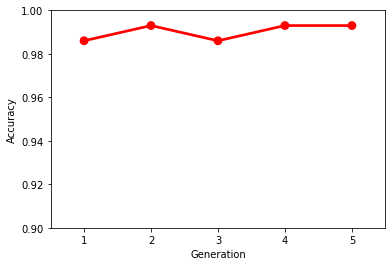

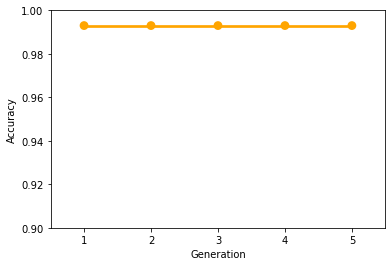

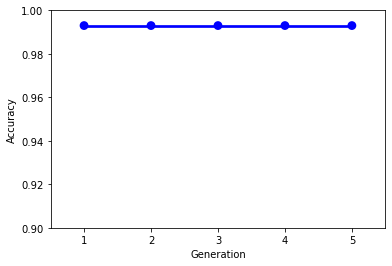

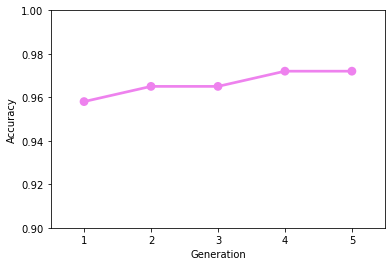

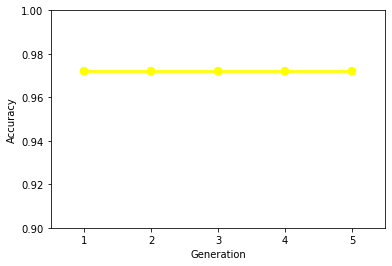

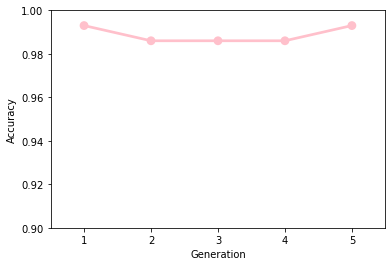

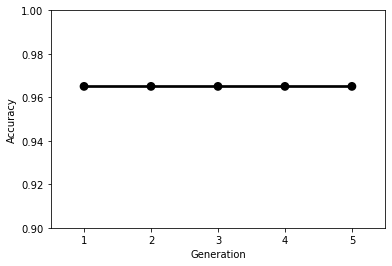

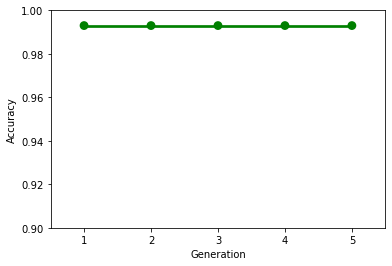

In [17]:
p1=plot(score_bc1,0.9,1.0,c = "Red")
p2=plot(score_bc2,0.9,1.0,c = "Orange")
p3=plot(score_bc3,0.9,1.0,c = "Blue")
p4=plot(score_bc4,0.9,1.0,c = "Violet")
p5=plot(score_bc5,0.9,1.0,c= "Yellow")
p6=plot(score_bc6,0.9,1.0,c = "Pink")
p7=plot(score_bc7,0.9,1.0,c = "Black")
p8=plot(score_bc8,0.9,1.0,c = "Green")
p1
p2
p3
p4
p5
p6
p7
p8

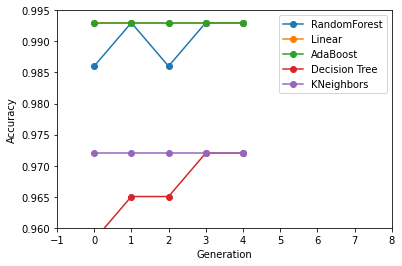

<Figure size 432x288 with 0 Axes>

In [31]:
plt.plot(score_bc1,'-o',label="RandomForest")
plt.plot(score_bc2,'-o',label="Linear")
plt.plot(score_bc3,'-o',label="AdaBoost")
plt.plot(score_bc4,'-o',label="Decision Tree")
plt.plot(score_bc5,'-o',label="KNeighbors")
#plt.plot(score_bc6,'-o',label="Gradient Boosting")
#plt.plot(score_bc7,'-o',label="Radial SVM")
#plt.plot(score_bc8,'-o',label="Linear SVM")
plt.xlim(-1, 8)
plt.ylim(0.96,0.995)
plt.xlabel("Generation")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
plt.savefig('generation_accuracy.jpg')